# 1. Acquiring, preprocessing, and analyzing the data

Importing libraries that are necessary for the project:

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Nick/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ylabel', 'axes', 'xlabel']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


First we load in the data and take a look

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data'
ionosphere = pd.read_csv(url)
ionosphere.head()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


In the following section the columns are assigned reasonable names for the sake of easily identifying them in the future:

In [3]:
clmns = []
pulse_no1 = 0

for i in range(0, ionosphere.shape[1] - 1):
    
    if (i%2 == 0):
        pulse_no1 = pulse_no1 + 1
        pulse_no2 = 1
    else:
        pulse_no2 = 2
    clmns.append('Pulse ' + str(pulse_no1) + '.' + str(pulse_no2))

clmns.append('Structure detected')

In [4]:
ionosphere.columns = clmns

In [5]:
ionosphere.head()

,Pulse 1.1,Pulse 1.2,Pulse 2.1,Pulse 2.2,Pulse 3.1,Pulse 3.2,Pulse 4.1,Pulse 4.2,Pulse 5.1,Pulse 5.2,...,Pulse 13.2,Pulse 14.1,Pulse 14.2,Pulse 15.1,Pulse 15.2,Pulse 16.1,Pulse 16.2,Pulse 17.1,Pulse 17.2,Structure detected
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


Let's do little bit of processing of different variables that might be interesting to look at. First, we look at the datatype of each column:

In [6]:
ionosphere.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 35 columns):
Pulse 1.1             350 non-null int64
Pulse 1.2             350 non-null int64
Pulse 2.1             350 non-null float64
Pulse 2.2             350 non-null float64
Pulse 3.1             350 non-null float64
Pulse 3.2             350 non-null float64
Pulse 4.1             350 non-null float64
Pulse 4.2             350 non-null float64
Pulse 5.1             350 non-null float64
Pulse 5.2             350 non-null float64
Pulse 6.1             350 non-null float64
Pulse 6.2             350 non-null float64
Pulse 7.1             350 non-null float64
Pulse 7.2             350 non-null float64
Pulse 8.1             350 non-null float64
Pulse 8.2             350 non-null float64
Pulse 9.1             350 non-null float64
Pulse 9.2             350 non-null float64
Pulse 10.1            350 non-null float64
Pulse 10.2            350 non-null float64
Pulse 11.1            350 non-null floa

Column Pulse 1.1 looks suspiciosly uniform. We check whether all entries of Pulse 1.1 are 1:

In [7]:
ionosphere.isin([1]).sum(axis = 0)[:1] #checking whether all entries of Pulse 1.1 are 1

Pulse 1.1    312
dtype: int64

Not all entries of Pulse 1.1 are 1.  However, column Pulse 1.2 looks suspiciosly uniform as well. We check whether all entries of Pulse 1.2 are 0:

In [8]:
ionosphere.isin([0]).sum(axis = 0)[1:2] #checking whether all entries of Pulse 1.2 are 0

Pulse 1.2    350
dtype: int64

We see that column Pulse 1.2 is constant and can be dropped:

In [9]:
ionosphere = ionosphere.drop(['Pulse 1.2'], axis = 1)
ionosphere

,Pulse 1.1,Pulse 2.1,Pulse 2.2,Pulse 3.1,Pulse 3.2,Pulse 4.1,Pulse 4.2,Pulse 5.1,Pulse 5.2,Pulse 6.1,...,Pulse 13.2,Pulse 14.1,Pulse 14.2,Pulse 15.1,Pulse 15.2,Pulse 16.1,Pulse 16.2,Pulse 17.1,Pulse 17.2,Structure detected
0,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
346,1,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
347,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
348,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


Just in case, the datatype inconsistensy is analyzed in a different way as well:

In [10]:
# Detecting dtype inconsistency
print('Columns with data type inconsistensy:')
n_weird_columns = 0
for col in ionosphere.columns:
    weird = (ionosphere[[col]].applymap(type) != ionosphere[[col]].iloc[0].apply(type)).any(axis=1)
    if len(ionosphere[weird]) > 0:
        print(col)
        n_weird_columns = n_weird_columns + 1
if (n_weird_columns == 0):
    print('None')

Columns with data type inconsistensy:
None


The last column has the 'object' type. It is transformed into numerical values with 0 corresponding to 'b' and 1 corresponding to 'g' as follows:

In [11]:
for i in range(len(ionosphere['Structure detected'])):
    y_i = ionosphere['Structure detected'][i]
    if (y_i == 'b'):
        ionosphere['Structure detected'][i] = 0
    elif (y_i == 'g'):
        ionosphere['Structure detected'][i] = 1

ionosphere = ionosphere.astype({'Structure detected': 'int64'})
ionosphere.head()

/Users/Nick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Nick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pulse 1.1,Pulse 2.1,Pulse 2.2,Pulse 3.1,Pulse 3.2,Pulse 4.1,Pulse 4.2,Pulse 5.1,Pulse 5.2,Pulse 6.1,...,Pulse 13.2,Pulse 14.1,Pulse 14.2,Pulse 15.1,Pulse 15.2,Pulse 16.1,Pulse 16.2,Pulse 17.1,Pulse 17.2,Structure detected
0,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
1,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
2,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
3,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
4,1,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0


In [12]:
ionosphere.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 34 columns):
Pulse 1.1             350 non-null int64
Pulse 2.1             350 non-null float64
Pulse 2.2             350 non-null float64
Pulse 3.1             350 non-null float64
Pulse 3.2             350 non-null float64
Pulse 4.1             350 non-null float64
Pulse 4.2             350 non-null float64
Pulse 5.1             350 non-null float64
Pulse 5.2             350 non-null float64
Pulse 6.1             350 non-null float64
Pulse 6.2             350 non-null float64
Pulse 7.1             350 non-null float64
Pulse 7.2             350 non-null float64
Pulse 8.1             350 non-null float64
Pulse 8.2             350 non-null float64
Pulse 9.1             350 non-null float64
Pulse 9.2             350 non-null float64
Pulse 10.1            350 non-null float64
Pulse 10.2            350 non-null float64
Pulse 11.1            350 non-null float64
Pulse 11.2            350 non-null fl

Splitting the data into the test and train datasets:

In [14]:
msk = np.random.rand(len(ionosphere)) < 0.8
train = ionosphere[msk]
test = ionosphere[~msk]
print('Train entries: ' + str(len(train)))
print('Test entries: ' + str(len(test)))

Train entries: 284
Test entries: 66


Checking how much of the train data are good and bad:

In [15]:
X_train = train.iloc[:, :-1] # feature values
y_train = train.iloc[:, -1] # target values

print('Number of good entries: ' + str(train.loc[y_train == 1].shape[0]))
print('Number of bad entries: ' + str(train.loc[y_train == 0].shape[0]))

Number of good entries: 180
Number of bad entries: 104


We can take a look at the prior probability of 'good' entries:

In [16]:
prior = train.loc[y_train == 1].shape[0] / (train.loc[y_train == 1].shape[0] + train.loc[y_train == 0].shape[0])
prior

0.6338028169014085

We can plot some data to see potential dependencies. In this section dependencies between Pulses i.1 and i.2 are plotted for $i = 2, 3, ..., 17$ ($i=1$ is obscluded since Pulse 1.2 is constant and dropped).

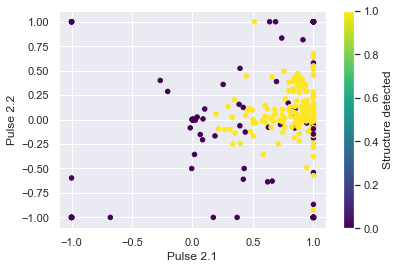

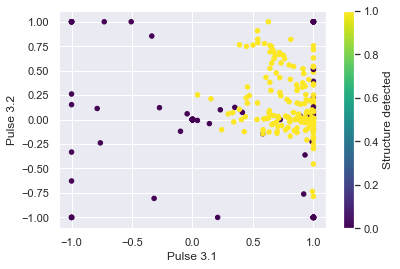

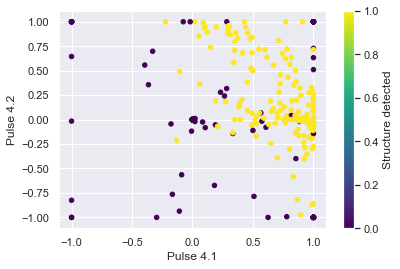

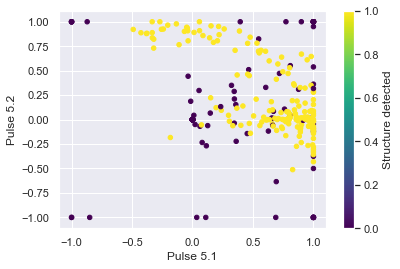

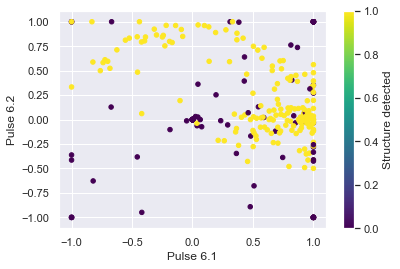

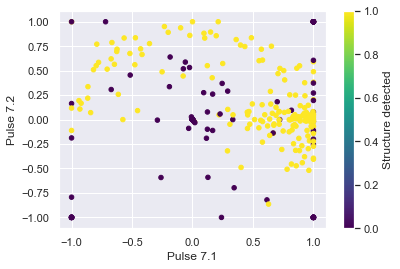

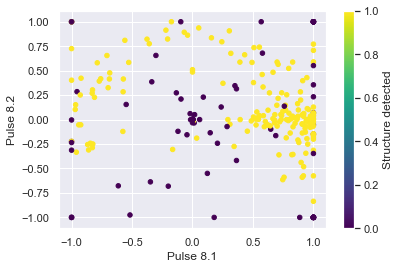

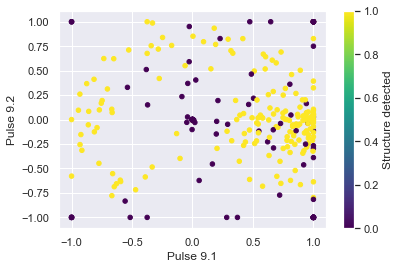

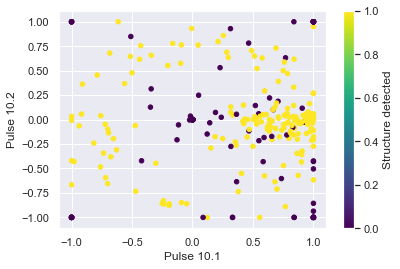

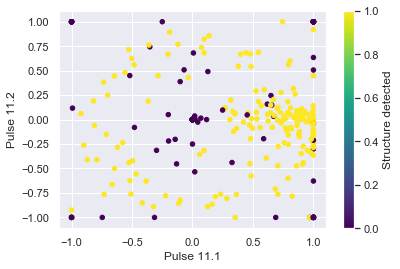

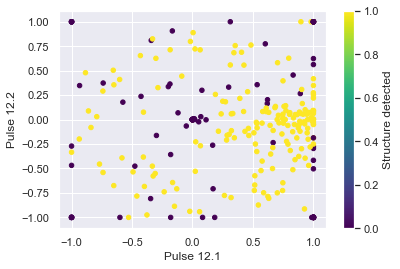

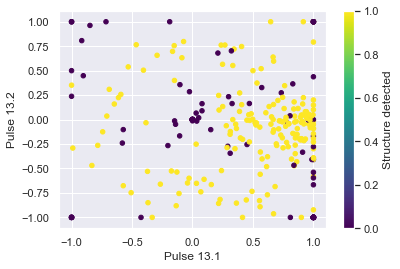

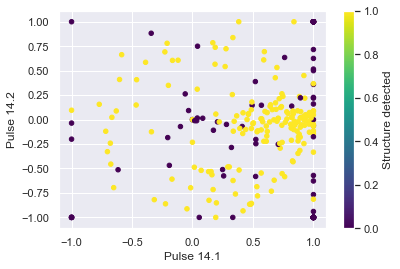

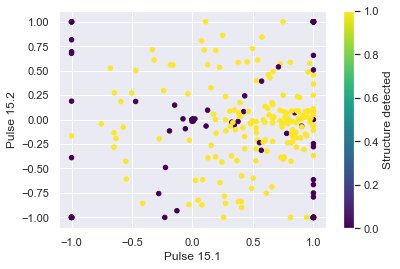

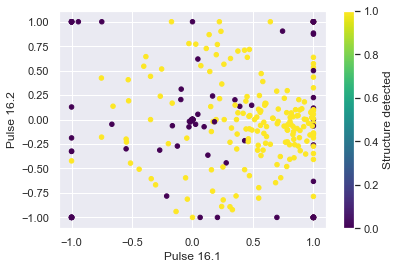

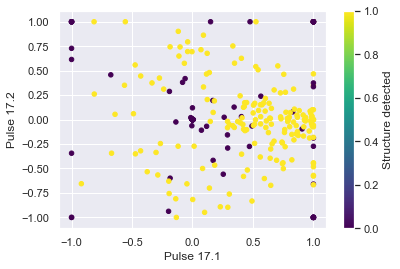

In [94]:
pulse_no1 = 2 # the Pulse we start with

for i in range(1, train.shape[1] - 1):
    
    if (i%2 == 0):
        pulse_no1 = pulse_no1 + 1
        pulse_no2 = 1
    else:
        pulse_no2 = 2
        xlabel = 'Pulse ' + str(pulse_no1) + '.' + str(1)
        ylabel = 'Pulse ' + str(pulse_no1) + '.' + str(2)
        
        fig, ax = plt.subplots()
        ax2 = train.plot.scatter(x=xlabel, y=ylabel, c = 'Structure detected', colormap='viridis', ax = ax)
    #clmns.append('Pulse ' + str(pulse_no1) + '.' + str(pulse_no2))


#plt.show()
#ionosphere.reset_index().plot(x="Pulse 2.1", y='Pulse 2.2', c = 'Structure detected', ax = (0, 0), colormap='viridis', kind = 'scatter')
#ionosphere.reset_index().plot(x="Pulse 3.1", y='Pulse 3.2', c = 'Structure detected', ax = (0, 1), colormap='viridis', kind = 'scatter')
#ionosphere.diff().plot(ax=axes[r,c]).scatter(x='Pulse 2.1', y='Pulse 2.2', c = 'Structure detected', colormap='viridis')
    
#ax1 = ionosphere.diff().plot.scatter(x='Pulse 2.1', y='Pulse 2.2', c = 'Structure detected', colormap='viridis')

# 2. Implementing the models

## 2.1. Implementing logistic regression

In [13]:
class Logistic_Regression:
    def __init__(self,
                 lr = 0.01, #learning rate of the gradient descent method
                 eps = 1e-2 # termination condition of the gradient descent method
                ):
        self.lr = lr
        self.eps = eps
        
    # Implementing the logistic function
    def __logistic_function(self, x):
        return 1/(1 + np.exp(-x))
    
    # Implementing the cost function
    def __cost(self,
               w, # N
               X_train, # N x D
               y_train, # N
              ):
        z = np.dot(X_train, w) # N x 1
        J = np.mean(y_train * np.log1p(np.exp(-z)) + (1 - y_train) * np.log1p(np.exp(z)))
        return J
    
    # Implementing the gradient function
    def __gradient(self,
                   w, # N
                   X_train, # N x D
                   y_train, # N
                  ):
        N = y_train.size
        z = np.dot(X_train, w) # N x 1
        yh = self.__logistic_function(z)
        return np.dot(X_train.T, (yh - y_train)) / N
    
    def __GradientDescent(self,
                          X_train, # N x D
                          y_train, # N
                          lr, #learning rate
                          #n_iterations = 300
                          eps# termination condition
                         ):
        #N, D = X.shape
        N = X_train.shape[0]
        
        intercept = np.ones((N, 1))
        X_train = np.concatenate((intercept, X_train), axis=1)
        
        D = X_train.shape[1]
        
        w = np.zeros(D)
        g = np.inf
        
        n_iterations = 0 # just for counting the number of iterations
        
        while (np.linalg.norm(g) > eps):
            g = self.__gradient(w, X_train, y_train)
            w = w - lr * g
            
            n_iterations += 1
        
        print('Number of iterations:', n_iterations)
        
        return w
    
    # Implementing the fit function
    def fit(self,
            X_train, # N x D
            y_train # N
            ):
        
        w = self.__GradientDescent(X_train, y_train, self.lr, self.eps)
        
        return w
    
    # Implementing the predict function
    def predict (self,
                 X_test,
                 w,
                threshold = 0.5
                ):
        intercept = np.ones((X_test.shape[0], 1))
        X_test = np.concatenate((intercept, X_test), axis=1)

        return self.__logistic_function(np.dot(X_test, w)) >= threshold
    
    # Function for checking the algorithm accuracy
    def evaluate_acc(self,
                    predicted_values,
                    true_values
                    ):
        check = []
        i = 0
        correct = 0
        incorrect = 0
        for y_i in true_values:
            if ((y_i == 1) and (predicted_values[i] == True)):
                check.append([True])
                correct += 1
            elif ((y_i == 0) and (predicted_values[i] == False)):
                check.append([True])
                correct += 1
            else:
                check.append([False])
                incorrect += 1  
            i += 1

        print('Correct classifications:', correct)
        print('Incorrect classifications:', incorrect)
        print('Accuracy:', correct/(correct + incorrect))

Setting up the logistic regression:

In [17]:
LR = Logistic_Regression()

Running the fit function:

In [18]:
%time w = LR.fit(X_train, y_train)
w

Number of iterations: 39068
CPU times: user 20.9 s, sys: 299 ms, total: 21.2 s
Wall time: 26.2 s


array([-4.61155896,  2.41881087,  1.48749968,  0.63451754,  2.41030903,
        2.0582793 ,  0.76402154,  1.75939667,  1.60370072, -0.38794147,
       -0.67171218, -0.72073588, -0.52161405,  1.14991689,  0.76793432,
       -0.29188937,  0.27977467,  0.72004985, -0.62692676, -0.23663691,
       -0.27892619, -2.43403498,  0.56803541,  0.71590223,  0.62511067,
        1.54349799, -2.28097072, -0.23189752,  0.75557659,  1.00853483,
        1.33166925, -0.64136564, -0.73771785, -1.25346394])

Separating the feature and the target values in the test dataset:

In [19]:
X_test = test.iloc[:, :-1] # feature values
y_test = test.iloc[:, -1] # target values

Running the predict function:

In [20]:
pred = LR.predict(X_test, w)

CPU times: user 1.03 ms, sys: 1.98 ms, total: 3.02 ms
Wall time: 2.6 ms


Checking how much of the test dataset was predicted correctly:

In [21]:
LR.evaluate_acc(pred, y_test)

Correct classifications: 58
Incorrect classifications: 8
Accuracy: 0.8787878787878788


## 2.2. Implementing Naïve Bayes

In [22]:
class Naive_Bayes:
    def __init__(self):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
    
    # Implementing the fit function
    def fit(self,
            X, # N x D
            y, # N
            learning_rate = 0.1,
            n_iterations = 300
            ):
        intercept = np.ones((X.shape[0], 1))
        X = np.concatenate((intercept, X), axis=1)
        w = np.zeros(X.shape[1])

        for i in range(n_iterations):
            z = np.dot(X, w)
            gradient = np.dot(X.T, (self.__logistic_function(z) - y)) / y.size
            w -= learning_rate * gradient

        return w
    
    # Implementing the predict function
    def predict (self,
                 X,
                 w,
                threshold = 0.5
                ):
        intercept = np.ones((X.shape[0], 1))
        X = np.concatenate((intercept, X), axis=1)

        return self.__logistic_function(np.dot(X, w)) >= threshold
    
    # Function for checking the algorithm accuracy
    def evaluate_acc(self,
                    predicted_values,
                    true_values
                    ):
        check = []
        i = 0
        correct = 0
        incorrect = 0
        for y_i in true_values:
            if ((y_i == 1) and (predicted_values[i] == True)):
                check.append([True])
                correct += 1
            elif ((y_i == 0) and (predicted_values[i] == False)):
                check.append([True])
                correct += 1
            else:
                check.append([False])
                incorrect += 1  
            i += 1

        print('Correct classifications:', correct)
        print('Incorrect classifications:', incorrect)
        print('Accuracy:', correct/(correct + incorrect))

In [107]:
def GaussianNaiveBayes(X_train, # N x D
                       y_train, # N x C
                       X_test, # N_test x D
                      ):
    N = y_train.shape[0]
    c = 0
    C = 1
    D = X_train.shape[1]
    mu, s = np.zeros((C,D)), np.zeros((C,D))
    #for c in range(C): #calculate mean and std
    #    inds = np.nonzero(y[:,c])[0]
    #    mu[c,:] = np.mean(X[inds,:], 0)
    #    s[c,:] = np.std(X[inds,:], 0)
    inds = np.nonzero(y_train[:])[0]
    mu = np.mean(X_train.iloc[inds, :])
    s = np.std(X_train.iloc[inds, :])
        
    #log_prior = np.log(np.mean(y_train))[:,None]
    log_prior = np.log(np.mean(y_train))
    #log_likelihood = - np.sum( np.log(s[:,None,:]) +.5*(((Xt[None,:,:] - mu[:,None,:])/s[:,None,:])**2), 2)
    log_likelihood = - np.sum( np.log(s) + .5*(((X_test - mu)/s)**2))
    return log_prior + log_likelihood #N_text x C

In [108]:
GaussianNaiveBayes(X_train, y_train, X_test.iloc[0])

/Users/Nick/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-12.491692592581595

In [117]:
log_prior - np.sum( np.log(s) + .5*(((X_test - mu)/s)**2), 1)

2      -3.669905
7       6.235651
14     -1.473716
15     13.892532
16    -41.069340
         ...    
317    17.119451
326    -1.888298
335     1.127819
337     7.489495
345    13.309197
Length: 66, dtype: float64

In [112]:
np.log(np.mean(y_train))

-0.4560173872709956

In [97]:
summary = summarize_dataset(train)

TypeError: cannot perform reduce with flexible type

In [42]:
log_prior = np.log(np.mean(y_train))
log_prior

-0.4560173872709956

In [48]:
gauss = log_prior - (np.log(s) + .5*(((X_test.iloc[0] - mu)/s)**2))
gauss

Pulse 1.1     0.479672
Pulse 2.1    -0.035784
Pulse 2.2    -0.260511
Pulse 3.1    -0.180454
Pulse 3.2    -1.319936
Pulse 4.1     0.132717
Pulse 4.2    -1.880863
Pulse 5.1    -0.253533
Pulse 5.2     0.123610
Pulse 6.1    -0.263514
Pulse 6.2     0.193161
Pulse 7.1    -0.202839
Pulse 7.2     0.096739
Pulse 8.1    -2.619387
Pulse 8.2     0.230757
Pulse 9.1     0.075785
Pulse 9.2    -0.218160
Pulse 10.1   -2.672186
Pulse 10.2   -0.430779
Pulse 11.1   -1.379864
Pulse 11.2   -1.189093
Pulse 12.1   -0.100675
Pulse 12.2    0.041964
Pulse 13.1   -0.501435
Pulse 13.2   -1.256456
Pulse 14.1    0.150516
Pulse 14.2   -1.335755
Pulse 15.1   -0.555306
Pulse 15.2    0.142306
Pulse 16.1    0.037890
Pulse 16.2   -1.314250
Pulse 17.1   -0.499351
Pulse 17.2   -1.497446
dtype: float64

In [49]:
gauss.max

<bound method Series.max of Pulse 1.1     0.479672
Pulse 2.1    -0.035784
Pulse 2.2    -0.260511
Pulse 3.1    -0.180454
Pulse 3.2    -1.319936
Pulse 4.1     0.132717
Pulse 4.2    -1.880863
Pulse 5.1    -0.253533
Pulse 5.2     0.123610
Pulse 6.1    -0.263514
Pulse 6.2     0.193161
Pulse 7.1    -0.202839
Pulse 7.2     0.096739
Pulse 8.1    -2.619387
Pulse 8.2     0.230757
Pulse 9.1     0.075785
Pulse 9.2    -0.218160
Pulse 10.1   -2.672186
Pulse 10.2   -0.430779
Pulse 11.1   -1.379864
Pulse 11.2   -1.189093
Pulse 12.1   -0.100675
Pulse 12.2    0.041964
Pulse 13.1   -0.501435
Pulse 13.2   -1.256456
Pulse 14.1    0.150516
Pulse 14.2   -1.335755
Pulse 15.1   -0.555306
Pulse 15.2    0.142306
Pulse 16.1    0.037890
Pulse 16.2   -1.314250
Pulse 17.1   -0.499351
Pulse 17.2   -1.497446
dtype: float64>

In [50]:
y_test

2      0
7      1
14     0
15     1
16     0
      ..
317    1
326    1
335    1
337    1
345    1
Name: Structure detected, Length: 66, dtype: int64

In [38]:
X_test.iloc[0]

Pulse 1.1     1.00000
Pulse 2.1     1.00000
Pulse 2.2    -0.45161
Pulse 3.1     1.00000
Pulse 3.2     1.00000
Pulse 4.1     0.71216
Pulse 4.2    -1.00000
Pulse 5.1     0.00000
Pulse 5.2     0.00000
Pulse 6.1     0.00000
Pulse 6.2     0.00000
Pulse 7.1     0.00000
Pulse 7.2     0.00000
Pulse 8.1    -1.00000
Pulse 8.2     0.14516
Pulse 9.1     0.54094
Pulse 9.2    -0.39330
Pulse 10.1   -1.00000
Pulse 10.2   -0.54467
Pulse 11.1   -0.69975
Pulse 11.2    1.00000
Pulse 12.1    0.00000
Pulse 12.2    0.00000
Pulse 13.1    1.00000
Pulse 13.2    0.90695
Pulse 14.1    0.51613
Pulse 14.2    1.00000
Pulse 15.1    1.00000
Pulse 15.2   -0.20099
Pulse 16.1    0.25682
Pulse 16.2    1.00000
Pulse 17.1   -0.32382
Pulse 17.2    1.00000
Name: 2, dtype: float64

In [188]:
X_train

,Pulse 1.1,Pulse 2.1,Pulse 2.2,Pulse 3.1,Pulse 3.2,Pulse 4.1,Pulse 4.2,Pulse 5.1,Pulse 5.2,Pulse 6.1,...,Pulse 13.1,Pulse 13.2,Pulse 14.1,Pulse 14.2,Pulse 15.1,Pulse 15.2,Pulse 16.1,Pulse 16.2,Pulse 17.1,Pulse 17.2
0,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
3,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
4,1,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,...,0.03513,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011
6,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,...,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000
7,1,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,0.92570,...,0.85106,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,1,0.66667,-0.01366,0.97404,0.06831,0.49590,0.50137,0.75683,-0.00273,0.65164,...,0.60656,0.06967,0.68656,0.17088,0.87568,0.07787,0.55328,0.24590,0.13934,0.48087
345,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
348,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [146]:
np.mean(X_train.loc[inds, :])

/Users/Nick/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Pulse 1.1     0.863014
Pulse 2.1     0.580495
Pulse 2.2     0.046102
Pulse 3.1     0.534140
Pulse 3.2     0.114797
Pulse 4.1     0.537160
Pulse 4.2     0.106207
Pulse 5.1     0.500647
Pulse 5.2     0.163998
Pulse 6.1     0.485645
Pulse 6.2     0.167525
Pulse 7.1     0.465185
Pulse 7.2     0.067152
Pulse 8.1     0.360771
Pulse 8.2     0.080743
Pulse 9.1     0.403787
Pulse 9.2     0.003292
Pulse 10.1    0.359957
Pulse 10.2    0.015740
Pulse 11.1    0.329176
Pulse 11.2    0.033619
Pulse 12.1    0.317997
Pulse 12.2   -0.035900
Pulse 13.1    0.355603
Pulse 13.2   -0.030059
Pulse 14.1    0.501924
Pulse 14.2   -0.082665
Pulse 15.1    0.284549
Pulse 15.2   -0.018314
Pulse 16.1    0.258625
Pulse 16.2   -0.035944
Pulse 17.1    0.325548
Pulse 17.2    0.023796
dtype: float64

In [125]:
X[inds]

NameError: name 'X' is not defined